## McDonald Case Study

In [205]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [206]:
df=pd.read_csv(r"C:\Users\adhiy\OneDrive\Desktop\great learninig\McDonalds Case Study-20240601T181703Z-001\McDonalds Case Study\mcdonalds.csv")
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [207]:
data=df

In [34]:
df.shape

(1453, 15)

In [208]:
df=df.iloc[:,0:11]
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No


In [209]:
df['yummy']=df['yummy'].replace('No',0)
df['yummy']=df['yummy'].replace('Yes',1)
df['convenient']=df['convenient'].replace('No',0)
df['convenient']=df['convenient'].replace('Yes',1)
df['spicy']=df['spicy'].replace('No',0)
df['spicy']=df['spicy'].replace('Yes',1)
df['fattening']=df['fattening'].replace('No',0)
df['fattening']=df['fattening'].replace('Yes',1)
df['greasy']=df['greasy'].replace('No',0)
df['greasy']=df['greasy'].replace('Yes',1)
df['fast']=df['fast'].replace('No',0)
df['fast']=df['fast'].replace('Yes',1)
df['cheap']=df['cheap'].replace('Yes',1)
df['cheap']=df['cheap'].replace('No',0)
df['tasty']=df['tasty'].replace('Yes',1)
df['tasty']=df['tasty'].replace('No',0)
df['expensive']=df['expensive'].replace('Yes',1)
df['expensive']=df['expensive'].replace('No',0)
df['healthy']=df['healthy'].replace('Yes',1)
df['healthy']=df['healthy'].replace('No',0)
df['disgusting']=df['disgusting'].replace('Yes',1)
df['disgusting']=df['disgusting'].replace('No',0)


In [210]:
final=pd.concat([df,data.iloc[:,11:15]],axis=1)
final

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [121]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
yummy,1453.0,0.552650,0.497391,0.0,0.0,1.0,1.0,1.0
convenient,1453.0,0.907777,0.289440,0.0,1.0,1.0,1.0,1.0
spicy,1453.0,0.093599,0.291371,0.0,0.0,0.0,0.0,1.0
fattening,1453.0,0.867171,0.339506,0.0,1.0,1.0,1.0,1.0
greasy,1453.0,0.526497,0.499469,0.0,0.0,1.0,1.0,1.0
fast,1453.0,0.900206,0.299828,0.0,1.0,1.0,1.0,1.0
cheap,1453.0,0.598761,0.490318,0.0,0.0,1.0,1.0,1.0
tasty,1453.0,0.644184,0.478925,0.0,0.0,1.0,1.0,1.0
expensive,1453.0,0.357880,0.479542,0.0,0.0,0.0,1.0,1.0
healthy,1453.0,0.198899,0.399309,0.0,0.0,0.0,0.0,1.0


### PCA 

In [42]:
from sklearn.decomposition import PCA
pca=PCA(n_components=11,random_state=123)
pca_transformed=pca.fit_transform(df)
pca_transformed

array([[ 0.42536706, -0.21907878,  0.6632553 , ...,  0.18100693,
         0.51570617, -0.56707389],
       [-0.21863768,  0.38818996, -0.73082668, ...,  0.11147641,
         0.49331285, -0.50044033],
       [ 0.37541475,  0.73043507, -0.12203978, ..., -0.32228786,
         0.06175857,  0.24274108],
       ...,
       [-0.18589445,  1.06266156,  0.22085675, ...,  0.03825472,
         0.05651822, -0.01279977],
       [-1.18206441, -0.03856977,  0.56156066, ...,  0.02226748,
        -0.00257265, -0.10531631],
       [ 1.55024186,  0.27503101, -0.01373727, ..., -0.13658866,
        -0.43279782, -0.45607556]])

In [43]:
pca.components_

array([[-0.47693349, -0.15533159, -0.00635636,  0.11623168,  0.3044427 ,
        -0.10849325, -0.33718593, -0.47151394,  0.32904173, -0.21371062,
         0.37475293],
       [ 0.36378978,  0.016414  ,  0.01880869, -0.03409395, -0.06383884,
        -0.0869722 , -0.61063276,  0.3073178 ,  0.60128596,  0.07659344,
        -0.13965633],
       [-0.30444402, -0.0625153 , -0.03701866, -0.32235949, -0.80237317,
        -0.06464172, -0.14931026, -0.28726479,  0.02439661,  0.19205128,
        -0.08857138],
       [ 0.0551622 , -0.14242496,  0.19761927, -0.35413876,  0.2539601 ,
        -0.09736269,  0.11895823, -0.00254696,  0.06781599,  0.76348804,
         0.36953871],
       [-0.30753507,  0.27760805,  0.07062017, -0.07340475,  0.36139895,
         0.10793025, -0.12897259, -0.21089912, -0.00312457,  0.28784553,
        -0.72920859],
       [ 0.17073819, -0.34783006, -0.3550866 , -0.40651542,  0.20934711,
        -0.59463206, -0.10324067, -0.07691443, -0.26134151, -0.17822612,
        -0.210

In [44]:
pca.explained_variance_

array([0.57312398, 0.36900226, 0.2546408 , 0.15904032, 0.11384214,
       0.09627033, 0.08392454, 0.07569209, 0.07035814, 0.06192225,
       0.05612296])

In [45]:
df_extracted_loadings=pd.DataFrame(pca.components_.T,
                                   index=df.columns)
df_extracted_loadings

,0,1,2,3,4,5,6,7,8,9,10
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069
healthy,-0.213711,0.076593,0.192051,0.763488,0.287846,-0.178226,-0.349616,0.176303,-0.185572,-0.038117,0.157608


C:\Users\adhiy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


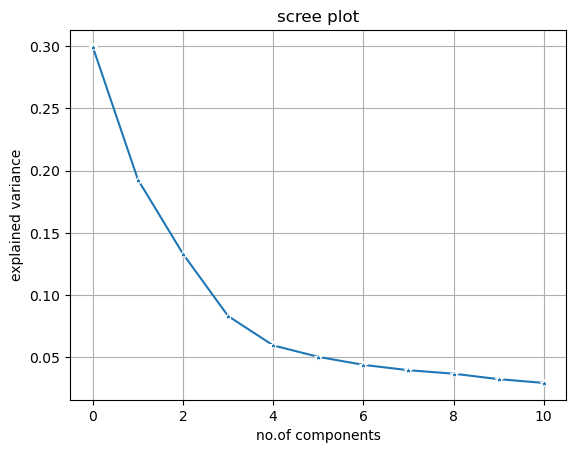

In [46]:
x=np.arange(0,11)
y=pca.explained_variance_ratio_
sns.lineplot(x,y,marker='*')
plt.xlabel('no.of components')
plt.ylabel('explained variance')
plt.title('scree plot')
plt.grid()

In [47]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [48]:
df_selected=df_extracted_loadings.iloc[:,0:11]
df_selected.rename(columns={0:'PC1',1:'PC2',2:'PC3',3:'PC4',4:'PC5',5:'PC6',6:'PC7',7:'PC8',8:'PC8',9:'PC9',10:'PC10',11:'PC11'},inplace=True)
df_selected

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC8,PC9,PC10
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069
healthy,-0.213711,0.076593,0.192051,0.763488,0.287846,-0.178226,-0.349616,0.176303,-0.185572,-0.038117,0.157608


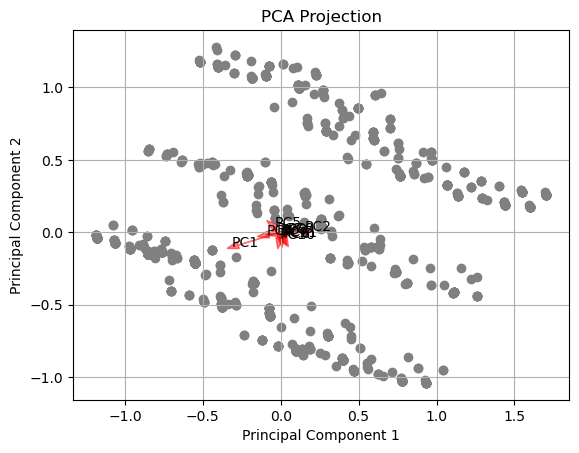

In [30]:
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], color='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
for i, (component, variance) in enumerate(zip(pca.components_, pca.explained_variance_)):
    plt.arrow(0, 0, component[0]*variance, component[1]*variance,
              color='red', alpha=0.5, head_width=0.05)
    plt.text(component[0]*variance*1.15, component[1]*variance*1.15, f'PC{i+1}', color='black')
plt.grid(True)
plt.show()

### Clustering by Kmeans

In [180]:
from sklearn.cluster import KMeans
wss=[]
dictionary={}
for i in range(1,9):
    k_means=KMeans(n_clusters=i,random_state=1234)
    k_means.fit_transform(df)
    wss.append(k_means.inertia_)
    dictionary[str(i)] = k_means
wss
dictionary

C:\Users\adhiy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


{'1': KMeans(n_clusters=1, random_state=1234),
 '2': KMeans(n_clusters=2, random_state=1234),
 '3': KMeans(n_clusters=3, random_state=1234),
 '4': KMeans(n_clusters=4, random_state=1234),
 '5': KMeans(n_clusters=5, random_state=1234),
 '6': KMeans(n_clusters=6, random_state=1234),
 '7': KMeans(n_clusters=7, random_state=1234),
 '8': KMeans(random_state=1234)}

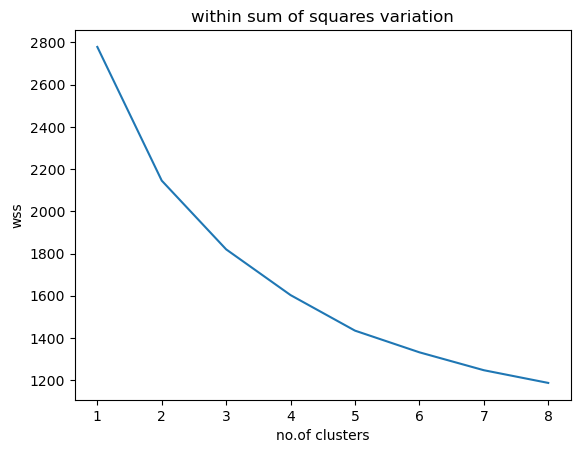

In [181]:
plt.plot(range(1,9),wss);
plt.xlabel("no.of clusters");
plt.ylabel("wss");
plt.title("within sum of squares variation");

### Silhoutte score

In [182]:
from sklearn.metrics import silhouette_samples,silhouette_score
ss=[]
for i in range(2,9):
    k_means=KMeans(n_clusters=i,random_state=1234)
    k_means.fit_transform(df)
    label=k_means.labels_
    sil_score=silhouette_score(df,label)
    ss.append(sil_score)
ss

[0.24441701827275675,
 0.23649965105414844,
 0.2574888202082713,
 0.2612871730877041,
 0.2711940997705873,
 0.28029151277081604,
 0.2842320873943917]

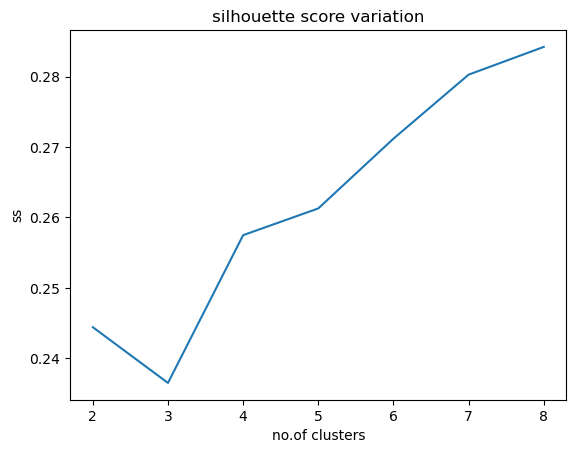

In [183]:
a=np.arange(2,9)
plt.plot(a,ss);
plt.xlabel("no.of clusters");
plt.ylabel("ss");
plt.title("silhouette score variation");

#### Analysing WSS and silhoutte graph we cannot conclude the  optimum clusters as it is not clearly visible. But rom business point of view we can take K=4(but still need to find the stable clusters)

### Global stability analysis 

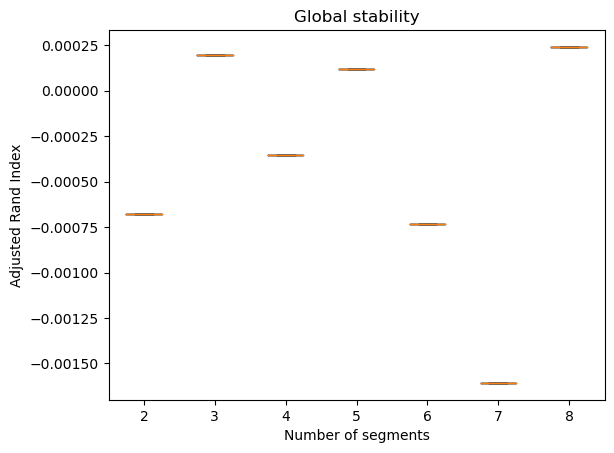

In [184]:
np.random.seed(1234) 
nboot = 100  
nrep = 10  
bootstrap_samples = []
for i in range(nboot):
    bootstrap_sample = resample(df.values, random_state=1234) 
    bootstrap_samples.append(bootstrap_sample)
adjusted_rand_index = []
num_segments = range(2, 9)
for k in num_segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        k_means = KMeans(n_clusters=k, n_init=nrep, random_state=1234)  
        k_means.fit(bootstrap_sample)
        cluster_labels = k_means.predict(bootstrap_sample)
        true_labels = k_means.predict(df.values)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)   
adjusted_rand_index = np.array(adjusted_rand_index).T
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Global stability")
plt.show()

#### From the global stability analysis the adjusted rand index is maximum for  3 cluster solution. However, it is high for 5 cluster solution but from business point, considering 3 cluster solution is optimum.

In [86]:
dictionary[str(4)].predict(df)

array([1, 3, 3, ..., 3, 0, 2])

### Segment Level Stability Across Solutions (SLSA) Plot

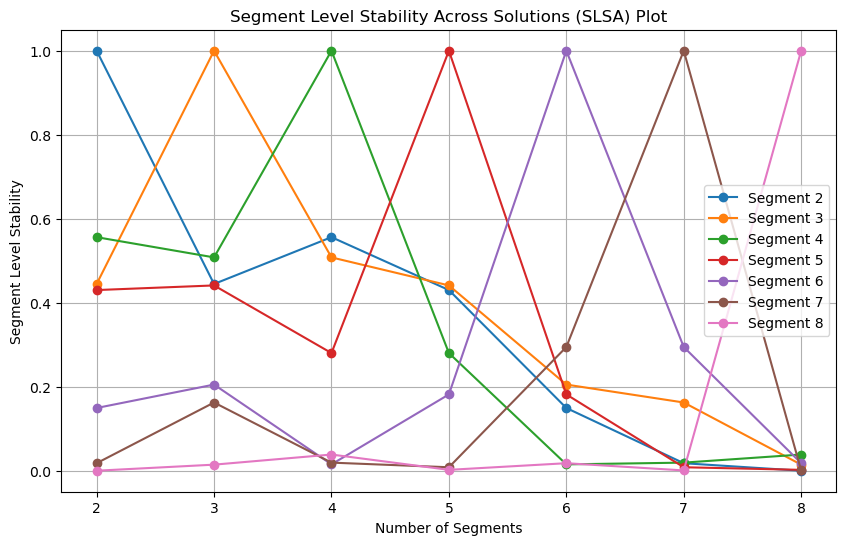

In [142]:
segment_stability = []
for segment in num_segments:
    labels_segment = dictionary[str(segment)].predict(df)
    segment_stability.append(labels_segment)
plt.figure(figsize=(10, 6))
for i, segment in enumerate(num_segments):
    stability_scores = [np.mean(segment_stability[i] == labels) for labels in segment_stability]
    plt.plot(num_segments, stability_scores, marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)
plt.show()


#### From SLSA plot the 3 cluster solution is almost stable in each value.

In [20]:
 dictionary[str(4)].transform(df).min(axis=1)

array([1.24673527, 1.03985095, 1.5374751 , ..., 0.71404582, 1.09351457,
       0.92529184])

### Segment Level Stability Within Solutions (SLSW) Plot

{1: array([1.30933422, 1.12591918, 1.7278655 , ..., 1.23215672, 1.54045233,
       1.78140572]), 2: array([1.18700649, 1.03060963, 1.83763118, ..., 1.12682984, 1.27986291,
       1.28015113]), 3: array([1.18597615, 1.07941087, 1.53261594, ..., 0.71489424, 1.13475051,
       1.3141637 ]), 4: array([1.24673527, 1.03985095, 1.5374751 , ..., 0.71404582, 1.09351457,
       0.92529184]), 5: array([1.23242931, 0.96719367, 1.57883931, ..., 0.61881309, 0.97175595,
       0.92328464]), 6: array([1.25247188, 0.94633658, 1.59196645, ..., 0.62711909, 0.45629725,
       0.90772419]), 7: array([1.16796912, 0.93052308, 1.61494267, ..., 0.6930947 , 0.47907787,
       0.86479703]), 8: array([1.12370834, 0.94415079, 1.60501959, ..., 0.66906465, 0.34440648,
       0.85616112])}


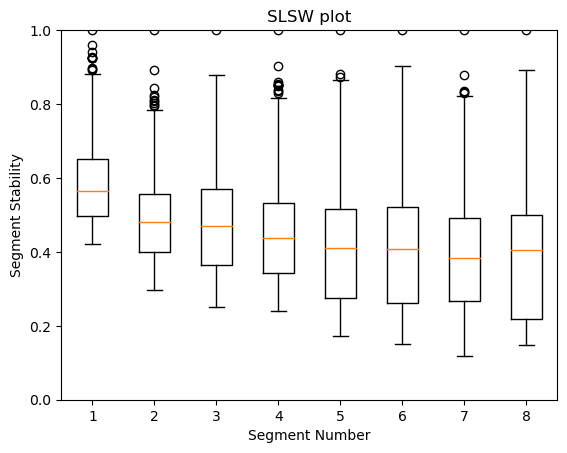

In [143]:
num_segments = range(1, 9)
segment_labels = {}
segment_similarities = {}

for segment in num_segments:
    segment_labels[segment] = dictionary[str(segment)].predict(df)
    segment_similarities[segment] = dictionary[str(segment)].transform(df).min(axis=1)
print(segment_similarities)

segment_stability_values = []
for segment in num_segments:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities) 
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.ylim(0, 1)
plt.title("SLSW plot")
plt.show()

####  From the  SLSW plot it is evident that stability is high for  3 cluster solution.

### Gaussian Mixture model

In [144]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


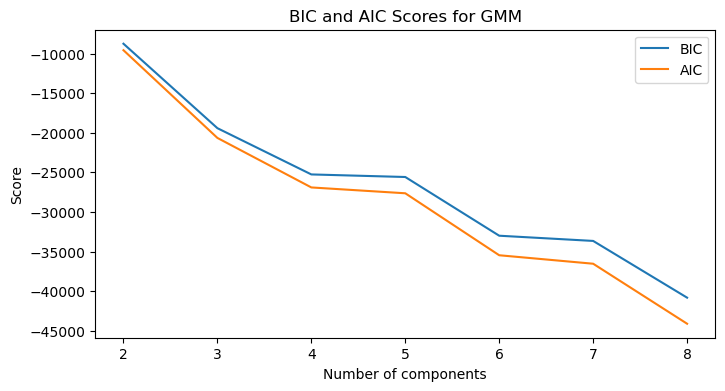

In [201]:
n_components = range(2, 9)
bic_scores = []
aic_scores = []
for k in n_components:
    gmm = GaussianMixture(n_components=k, random_state=1)
    gmm.fit(df)
    bic_scores.append(gmm.bic(df))
    aic_scores.append(gmm.aic(df))
plt.figure(figsize=(8, 4))
plt.plot(n_components, bic_scores, label='BIC')
plt.plot(n_components, aic_scores, label='AIC')
plt.xlabel('Number of components')
plt.ylabel('Score')
plt.legend()
plt.title('BIC and AIC Scores for GMM')
plt.show()

#### From the plot above  low BIC AIC value gives optimum clusters but business point we take  optimum components=4

### Cluster profiling using Kmeans(K=3)

In [185]:
k_means=KMeans(n_clusters=3)
labels=k_means.fit_predict(df)
labels

array([2, 1, 1, ..., 1, 0, 2])

In [186]:
final['clusters']=labels

In [187]:
final

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,clusters
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,2
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,1
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,1
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male,2
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female,0
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female,1
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male,0


In [151]:
final['clusters'].value_counts().sort_index()

0    590
1    370
2    493
Name: clusters, dtype: int64

C:\Users\adhiy\AppData\Local\Temp\ipykernel_11148\3471290281.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final.groupby(by=['clusters'])['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting'].mean().plot(kind='bar',figsize=(15,6));


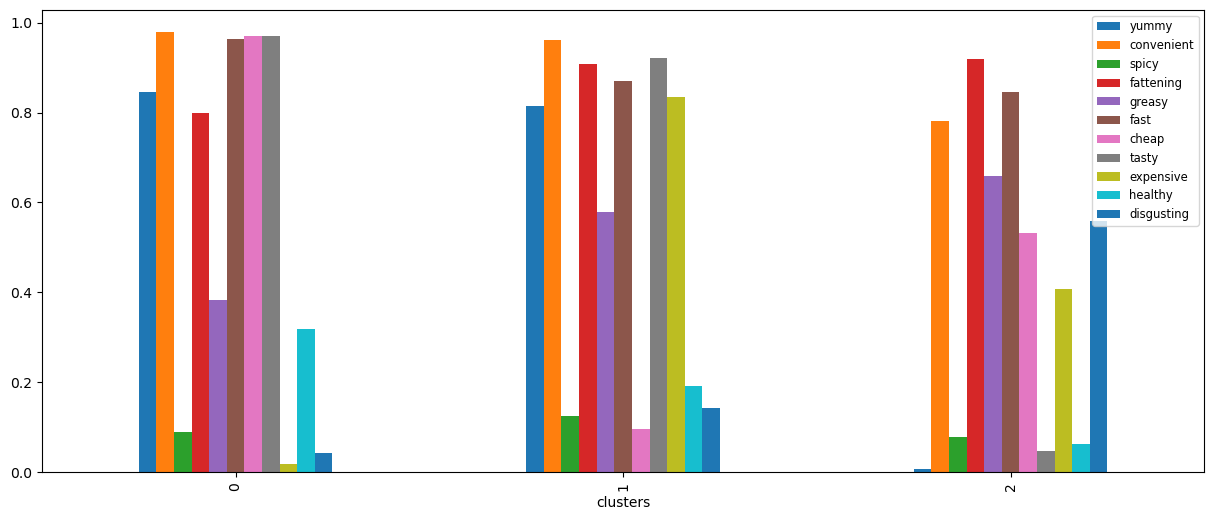

In [198]:
final.groupby(by=['clusters'])['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting'].mean().plot(kind='bar',figsize=(15,6));
plt.legend(loc='upper right', fontsize='small')

In [162]:
final.groupby(by=['Gender','clusters']).count()

yummy  convenient  spicy  fattening  greasy  fast  cheap  \
Gender clusters                                                             
Female 0           352         352    352        352     352   352    352   
       1           181         181    181        181     181   181    181   
       2           255         255    255        255     255   255    255   
Male   0           238         238    238        238     238   238    238   
       1           189         189    189        189     189   189    189   
       2           238         238    238        238     238   238    238   

                 tasty  expensive  healthy  disgusting  Like  Age  \
Gender clusters                                                     
Female 0           352        352      352         352   352  352   
       1           181        181      181         181   181  181   
       2           255        255      255         255   255  255   
Male   0           238        238      238         238   238  238   
       1           189        189      189         189   189  189   
       2           238        238      238         238   238  238   

                 VisitFrequency  
Gender clusters                  
Female 0                    352  
       1                    181  
       2                    255  
Male   0                    238  
       1                    189  
       2                    238

C:\Users\adhiy\AppData\Local\Temp\ipykernel_11148\2632418398.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final.groupby(by=['clusters','Gender'])['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting'].mean().plot(kind='bar',figsize=(15,6));


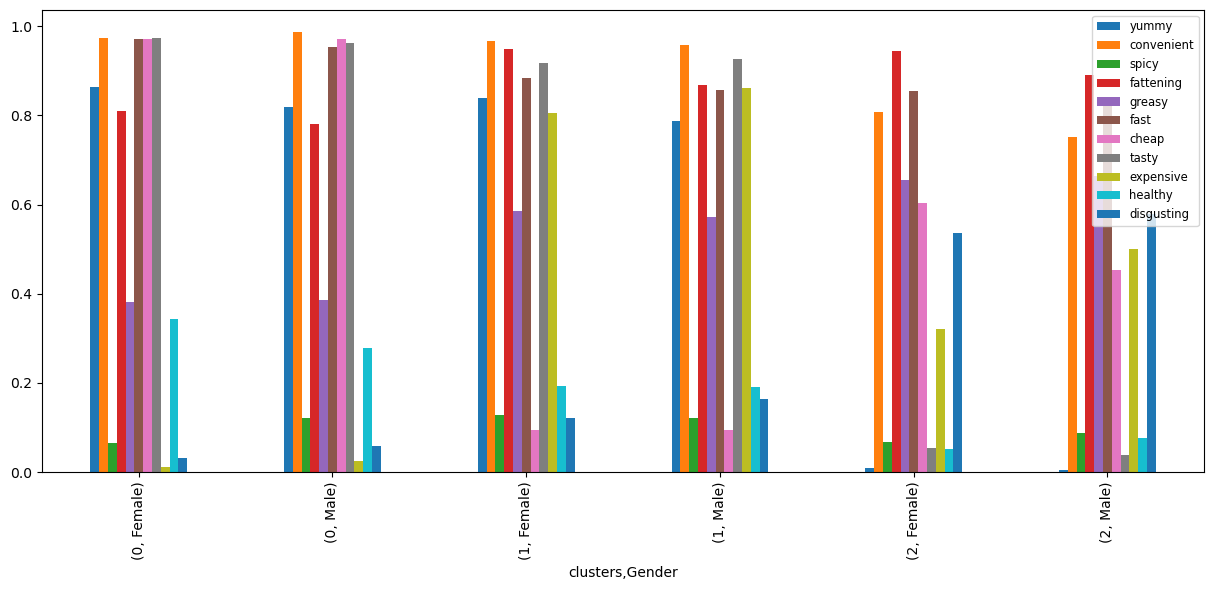

In [200]:
final.groupby(by=['clusters','Gender'])['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting'].mean().plot(kind='bar',figsize=(15,6));
plt.legend(loc='upper right', fontsize='small')

### cluster profiling using GMM with components=4

In [203]:
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm.fit(df)
gmm_clusters = gmm.predict(df)

In [212]:
final['clusters']=gmm_clusters


In [213]:
final

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,clusters
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,2
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,3
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,3
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male,0
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female,1
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female,0
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male,1


In [214]:
final['clusters'].value_counts().sort_index()

0    455
1    392
2    294
3    312
Name: clusters, dtype: int64

C:\Users\adhiy\AppData\Local\Temp\ipykernel_11148\1149841204.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final.groupby(by=['clusters'])['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting'].mean().plot(kind='bar',figsize=(15,6));


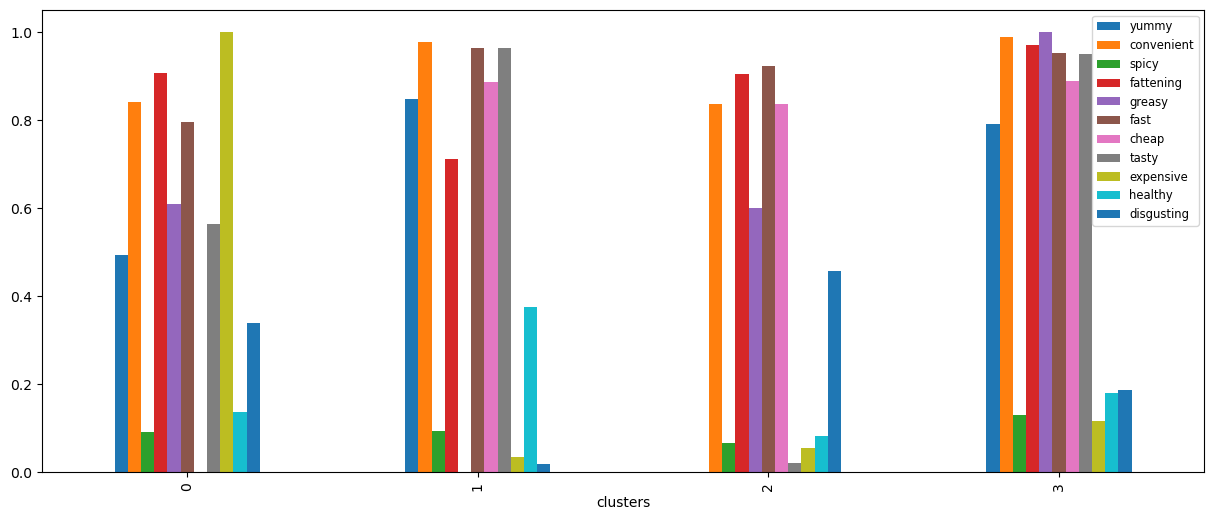

In [215]:
final.groupby(by=['clusters'])['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting'].mean().plot(kind='bar',figsize=(15,6));
plt.legend(loc='upper right', fontsize='small')

In [216]:
final.groupby(by=['Gender','clusters']).count()

yummy  convenient  spicy  fattening  greasy  fast  cheap  \
Gender clusters                                                             
Female 0           205         205    205        205     205   205    205   
       1           237         237    237        237     237   237    237   
       2           166         166    166        166     166   166    166   
       3           180         180    180        180     180   180    180   
Male   0           250         250    250        250     250   250    250   
       1           155         155    155        155     155   155    155   
       2           128         128    128        128     128   128    128   
       3           132         132    132        132     132   132    132   

                 tasty  expensive  healthy  disgusting  Like  Age  \
Gender clusters                                                     
Female 0           205        205      205         205   205  205   
       1           237        237      237         237   237  237   
       2           166        166      166         166   166  166   
       3           180        180      180         180   180  180   
Male   0           250        250      250         250   250  250   
       1           155        155      155         155   155  155   
       2           128        128      128         128   128  128   
       3           132        132      132         132   132  132   

                 VisitFrequency  
Gender clusters                  
Female 0                    205  
       1                    237  
       2                    166  
       3                    180  
Male   0                    250  
       1                    155  
       2                    128  
       3                    132

C:\Users\adhiy\AppData\Local\Temp\ipykernel_11148\2632418398.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final.groupby(by=['clusters','Gender'])['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting'].mean().plot(kind='bar',figsize=(15,6));


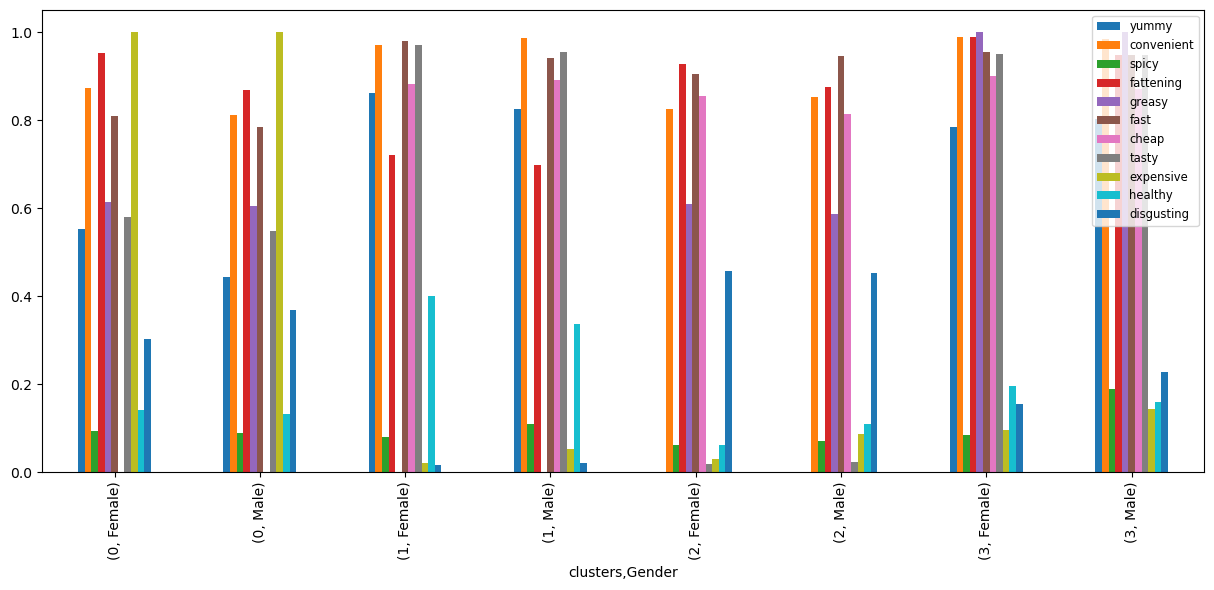

In [217]:
final.groupby(by=['clusters','Gender'])['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting'].mean().plot(kind='bar',figsize=(15,6));
plt.legend(loc='upper right', fontsize='small')